,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


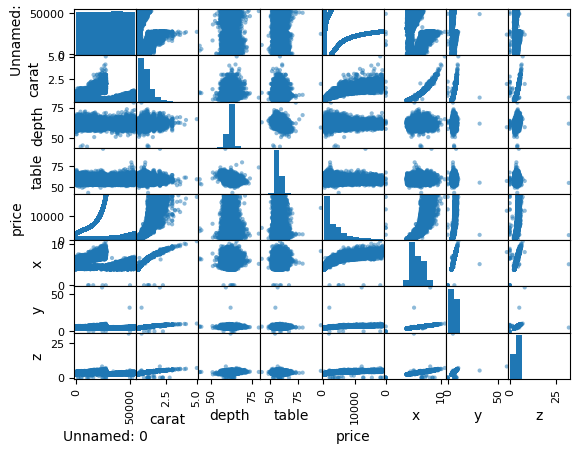

In [ ]:
import numpy as np
import pandas as pd
#Reading in Data
Diamonds=pd.read_csv('/content/diamonds.csv')
Diamonds_Train = pd.read_csv('/content/diamonds_train.csv')
Diamonds_Test = pd.read_csv('/content/diamonds_test.csv')
Diamonds_Val = pd.read_csv('/content/diamonds_val.csv')
#Scatterplot matrix of training data
pd.plotting.scatter_matrix(Diamonds_Train)
#Correlation Matrix of training data without "cut", "color", "clarity" columns
corr = Diamonds.drop(columns=['cut', 'color', 'clarity']).corr()
corr.style.background_gradient(cmap='coolwarm')


<Axes: xlabel='cut', ylabel='price'>

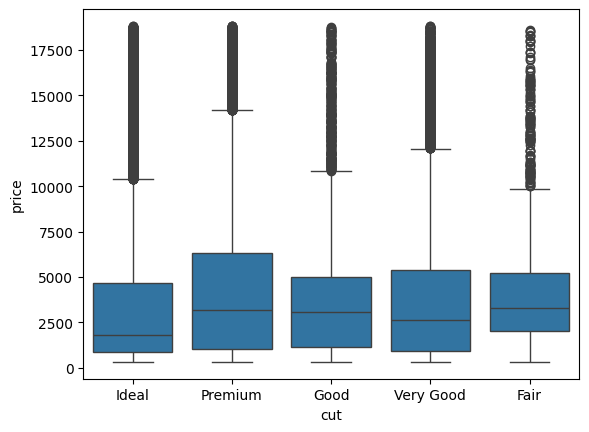

In [ ]:
#Boxplot of price by cut
import seaborn as sns
sns.boxplot(x='cut', y='price', data=Diamonds)

<Axes: xlabel='color', ylabel='price'>

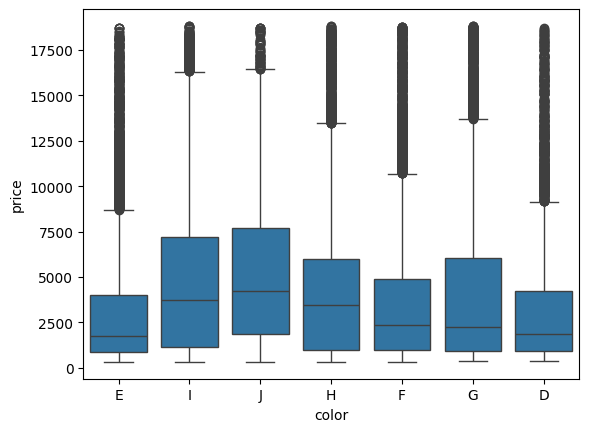

In [ ]:
#Boxplot of price by color
sns.boxplot(x='color', y='price', data=Diamonds)

<Axes: xlabel='clarity', ylabel='price'>

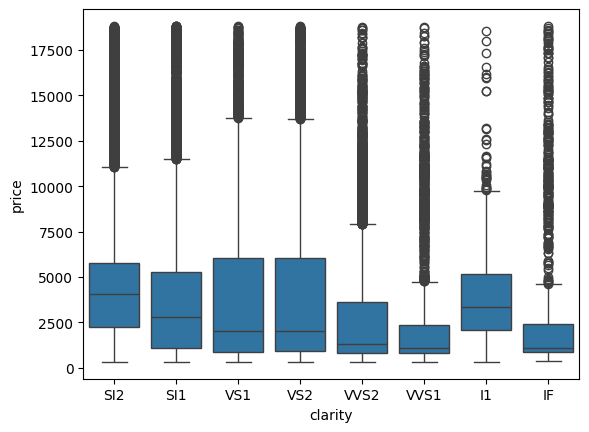

In [ ]:
#Boxplot of price by clarity
sns.boxplot(x='clarity', y='price', data=Diamonds)

In [ ]:
#Combining sparse factor levels
#Feature engineering cut variable with 0 for 'ideal' and 1 for other levels for training, validation, and testing set
Diamonds_Train['cut'] = Diamonds_Train['cut'].replace({'Ideal': 0, 'Premium': 1, 'Very Good': 1, 'Good': 1, 'Fair': 1})
Diamonds_Val['cut'] = Diamonds_Val['cut'].replace({'Ideal': 0, 'Premium': 1, 'Very Good': 1, 'Good': 1, 'Fair': 1})
Diamonds_Test['cut'] = Diamonds_Test['cut'].replace({'Ideal': 0, 'Premium': 1, 'Very Good': 1, 'Good': 1, 'Fair': 1})
#Feature engineering color variable with 0 for 'E','F','G', 'D' and 1 for other levels for training, validation, and testing set
Diamonds_Train['color'] = Diamonds_Train['color'].replace({'E': 0, 'F': 0, 'G': 0, 'D': 0, 'H': 1, 'I': 1, 'J': 1})
Diamonds_Val['color'] = Diamonds_Val['color'].replace({'E': 0, 'F': 0, 'G': 0, 'D': 0, 'H': 1, 'I': 1, 'J': 1})
Diamonds_Test['color'] = Diamonds_Test['color'].replace({'E': 0, 'F': 0, 'G': 0, 'D': 0, 'H': 1, 'I': 1, 'J': 1})
#Feature engineering clarity variable with 0 for 'VS1','VS2','VVS2', 'VVS1','IF' and 1 for other levels for training, validation, and testing set
Diamonds_Train['clarity'] = Diamonds_Train['clarity'].replace({'VS1': 0, 'VS2': 0, 'VVS2': 0, 'VVS1': 0, 'IF': 0, 'SI1':1, 'SI2':1, 'I1':1})
Diamonds_Val['clarity'] = Diamonds_Val['clarity'].replace({'VS1': 0, 'VS2': 0, 'VVS2': 0, 'VVS1': 0, 'IF': 0, 'SI1':1, 'SI2':1, 'I1':1})
Diamonds_Test['clarity'] = Diamonds_Test['clarity'].replace({'VS1': 0, 'VS2': 0, 'VVS2': 0, 'VVS1': 0, 'IF': 0, 'SI1':1, 'SI2':1, 'I1':1})
# Ensure all predictor columns are numeric
for column in ['cut', 'color', 'clarity']:
    Diamonds_Train[column] = pd.to_numeric(Diamonds_Train[column], errors='coerce')
    Diamonds_Val[column] = pd.to_numeric(Diamonds_Val[column], errors='coerce')
    Diamonds_Test[column] = pd.to_numeric(Diamonds_Test[column], errors='coerce')

<ipython-input-5-95b787395cb8>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Diamonds_Train['cut'] = Diamonds_Train['cut'].replace({'Ideal': 0, 'Premium': 1, 'Very Good': 1, 'Good': 1, 'Fair': 1})
<ipython-input-5-95b787395cb8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Diamonds_Val['cut'] = Diamonds_Val['cut'].replace({'Ideal': 0, 'Premium': 1, 'Very Good': 1, 'Good': 1, 'Fair': 1})
<ipython-input-5-95b787395cb8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

In [ ]:
#Create linear regression model with carat, x, y and z as predictors, price as response
import statsmodels.api as sm
X=Diamonds_Train[['carat', 'x', 'y', 'z']]
X = sm.add_constant(X)
y=Diamonds_Train['price']
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.301e+04
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:30:36   Log-Likelihood:            -3.7733e+05
No. Observations:               43152   AIC:                         7.547e+05
Df Residuals:                   43147   BIC:                         7.547e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1867.5841    116.721     16.000      0.000    1638.808    2096.360
carat       1.018e+04     70.390    144.631      0.000       1e+04    1.03e+04
x           -882.7343     42.907    -20.573      0.000    -966.832    -798.636
y            131.5235     25.895      5.079      0.000      80.769     182.278
z           -497.9840     40.856    -12.189      0.000    -578.062    -417.906
==============================================================================
Omnibus:                    11777.029   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           262493.544
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                      14.980   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Find the testing error using the validation set and training model
X_val=Diamonds_Val[['carat', 'x', 'y', 'z']]
X_val = sm.add_constant(X_val)
y_val=Diamonds_Val['price']
y_pred=model.predict(X_val)
#Show testing error (MSE, AIC, BIC) on validation set
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_val, y_pred)
print('MSE:', mse)
n = len(y_val)
k = X_val.shape[1]
aic_val = n * np.log(mse) + 2 * k
bic_val = n * np.log(mse) + k * np.log(n)
print('Validation AIC:', aic_val)
print('Validation BIC:', bic_val)


MSE: 2342207.955669378
Validation AIC: 79121.6652838687
Validation BIC: 79154.6304963872


In [ ]:
Diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
from itertools import combinations
predictors = ['carat', 'x', 'y', 'z','depth','table','cut','color']
# Define train and validation data
X_train_full = Diamonds_Train[predictors]
y_train = Diamonds_Train['price']
X_val_full = Diamonds_Val[predictors]
y_val = Diamonds_Val['price']

# Store results
results = []

# Loop over all possible subsets of predictors
for k in range(1, len(predictors) + 1):
    for subset in combinations(predictors, k):
        # Train model on subset
        X_train = (X_train_full[list(subset)])
        X_train = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train).fit()

        # Predict on validation set using same subset
        X_val = sm.add_constant(X_val_full[list(subset)])
        y_pred = model.predict(X_val)

        # Compute metrics
        mse = mean_squared_error(y_val, y_pred)
        n = len(y_val)
        k_params = X_val.shape[1]  # includes constant
        aic_val = n * np.log(mse) + 2 * k_params
        bic_val = n * np.log(mse) + k_params * np.log(n)

        # Save results
        results.append({
            'subset': subset,
            'MSE': mse,
            'AIC': aic_val,
            'BIC': bic_val
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='MSE')

# Show best models by MSE, AIC, BIC
print("Top models by MSE:")
print(results_df.nsmallest(3, 'MSE'))

print("\nTop models by AIC:")
print(results_df.nsmallest(3, 'AIC'))

print("\nTop models by BIC:")
print(results_df.nsmallest(3, 'BIC'))

Top models by MSE:
                                         subset           MSE           AIC  \
250     (carat, x, y, depth, table, cut, color)  2.071111e+06  78464.155414   
254  (carat, x, y, z, depth, table, cut, color)  2.071344e+06  78466.761913   
232        (carat, x, depth, table, cut, color)  2.071657e+06  78463.576039   

              BIC  
250  78516.899754  
254  78526.099296  
232  78509.727336  

Top models by AIC:
                                      subset           MSE           AIC  \
232     (carat, x, depth, table, cut, color)  2.071657e+06  78463.576039   
250  (carat, x, y, depth, table, cut, color)  2.071111e+06  78464.155414   
251  (carat, x, z, depth, table, cut, color)  2.071902e+06  78466.214139   

              BIC  
232  78509.727336  
250  78516.899754  
251  78518.958479  

Top models by BIC:
                                      subset           MSE           AIC  \
232     (carat, x, depth, table, cut, color)  2.071657e+06  78463.576039   
250  (c

In [ ]:
#Create linear regression model with carat, x, y and z as predictors, price as response
import statsmodels.api as sm
X=Diamonds_Train[['carat', 'x', 'depth', 'table','cut','color']]
X = sm.add_constant(X)
y=Diamonds_Train['price']
model=sm.OLS(y,X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 4.889e+04
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:30:41   Log-Likelihood:            -3.7451e+05
No. Observations:               43152   AIC:                         7.490e+05
Df Residuals:                   43145   BIC:                         7.491e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.763e+04    485.020     36.352      0.000    1.67e+04    1.86e+04
carat        1.12e+04     68.003    164.651      0.000    1.11e+04    1.13e+04
x          -1334.0856     28.562    -46.708      0.000   -1390.068   -1278.103
depth       -175.3516      5.274    -33.247      0.000    -185.689    -165.014
table        -64.4488      3.968    -16.240      0.000     -72.227     -56.671
cut         -268.3866     17.251    -15.558      0.000    -302.199    -234.575
color       -982.8621     15.451    -63.613      0.000   -1013.146    -952.579
==============================================================================
Omnibus:                    10156.258   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388817.294
Skew:                           0.388   Prob(JB):                         0.00
Kurtosis:                      17.685   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Best model according to best subset selection
#Find the testing error using the validation set and training model
X_val=Diamonds_Val[['carat', 'x', 'depth', 'table','cut','color']]
X_val = sm.add_constant(X_val)
y_val=Diamonds_Val['price']
y_pred=model.predict(X_val)
#Show testing error (MSE, AIC, BIC) on validation set
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_val, y_pred)
print('MSE:', mse)
n = len(y_val)
k = X_val.shape[1]
aic_val = n * np.log(mse) + 2 * k
bic_val = n * np.log(mse) + k * np.log(n)
print('Validation AIC:', aic_val)
print('Validation BIC:', bic_val)

MSE: 2071656.547964302
Validation AIC: 78463.57603889516
Validation BIC: 78509.72733642106
